In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myFont = FontProperties( fname=r"C:\Windows\Fonts\kaiu.ttf" )
# plt.rcParams['font.sas-serig']=['SimHei'] #用來正常顯示中文標籤
# plt.rcParams['axes.unicode_minus']=False #用來正常顯示負號

li1 = [2,5,4,8,10]
li2 = ['第一類','第二類','第三類','第四類','第五類']
s1 = pd.Series(li1,index=li2)
%matplotlib inline
plt.title("Pandas繪圖",fontProperties=myFont)
plt.plot(s1)
# plt.show()

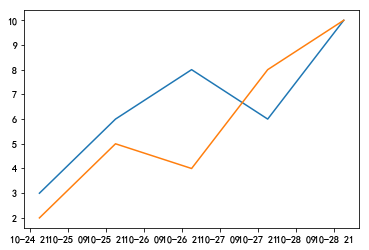

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 第一種產生方式
d1 = [2, 5, 4, 8, 10]
d2 = [3, 6, 8, 6, 10]
date_time = pd.date_range('20181025', periods=5)
df1 = pd.DataFrame({'data1': d1, 'data2': d2}, date_time)
# 第二種方式
r = [[3, 2], [6, 5], [8, 4], [6, 8], [10, 10]]
df2 = pd.DataFrame(r, columns=['data1', 'data2'], index=date_time)

# plt.plot(df1)
plt.plot(df2)

In [12]:
import pandas as pd
li1 = [2,3,4,5,6]
li2 = [3,5,7,9,11]
dTime = pd.date_range("20181207",periods=5)
se1 = pd.Series(li1,[1,2,3,4,5])
se2 = pd.Series(li2,dTime)
print(se1)
print(se2)
se2-se1

1    2
2    3
3    4
4    5
5    6
dtype: int64
2018-12-07     3
2018-12-08     5
2018-12-09     7
2018-12-10     9
2018-12-11    11
Freq: D, dtype: int64


2018-12-07 00:00:00   NaN
2018-12-08 00:00:00   NaN
2018-12-09 00:00:00   NaN
2018-12-10 00:00:00   NaN
2018-12-11 00:00:00   NaN
1                     NaN
2                     NaN
3                     NaN
4                     NaN
5                     NaN
dtype: float64

In [15]:
pd.DataFrame({'data1':li1,'data2':li2},dTime)

,data1,data2
2018-12-07,2,3
2018-12-08,3,5
2018-12-09,4,7
2018-12-10,5,9
2018-12-11,6,11


In [ ]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

fig = figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')

show()

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
起始資金 = 1000
每月薪水 = 10
每月開銷 = 2
每月房租 = 2.5
退休年齡 = 70
起算年齡 = 50
結算年齡 = 100
預測時段 = range( 起算年齡, 結算年齡, 1  )
投資部位 = 0.7
投資年利率 = 1.05
買房價格 = 1500
買房頭期款 = 300
買房年紀 = 55
房貸利率 = 8
貸款年數 = 20

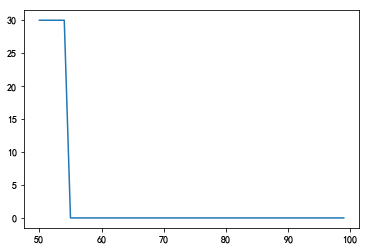

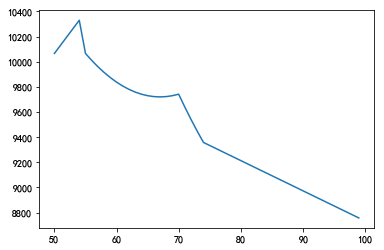

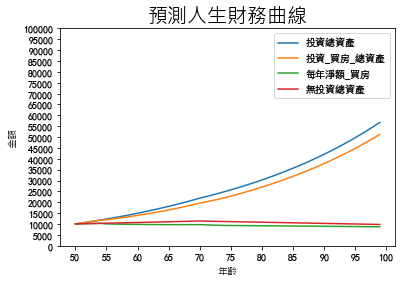

In [79]:
#每年淨額（ 銀行帳戶變化 = 總收入 - 總支出 ）
每年淨額 = pd.Series( 0, index=預測時段 )
每年淨額.iloc[ 0 ] = 起始資金
每年淨額.loc[ : 退休年齡 ] += 每月薪水 * 12
每年淨額 -= ( 每月開銷 + 每月房租 ) * 12
# plt.plot( 每年淨額 )
# plt.show( )
無投資總資產 = 每年淨額.cumsum( )
# plt.plot( 無投資總資產 )
# plt.show( )

def compound(arr, ratio, return_rate):
    ret = [ arr.iloc[0] ]
    for v in arr[1 :]:
        ret.append(ret[-1 ] * ratio * return_rate + ret[-1 ] * (1  - ratio) + v)
    return pd.Series(ret, 預測時段)
投資總資產 = compound(每年淨額, 投資部位, 投資年利率)
# plt.plot( 投資總資產 )
# plt.plot( 無投資總資產 )
# plt.show( )

#考慮買房
買房花費 = pd.Series( 0, index=預測時段 )
買房花費[買房年紀] = 買房頭期款
買房花費.loc[買房年紀:買房年紀+貸款年數-1 ] += (買房價格 - 買房頭期款) / 貸款年數
# plt.plot( 買房花費 )
# plt.show( )

#貸款利息
欠款 = pd.Series(0, index=預測時段)
欠款[買房年紀] = 買房價格
欠款 = 欠款.cumsum()
欠款 = 欠款 - 買房花費.cumsum()
利息 = 欠款.shift().fillna(0) * 房貸利率 / 100
# plt.plot(利息)
# plt.show( )

#計算繳房租
房租年繳 = pd.Series(每月房租*12, index=預測時段)
房租年繳.loc[買房年紀:] = 0
plt.plot(房租年繳)
plt.show( )
每年淨額_買房 = pd.Series(0, index=預測時段)
每年淨額_買房.iloc[0] = 起始資金
每年淨額_買房.loc[:退休年齡] += 每月薪水 * 12
每年淨額_買房 -= (每月開銷*12 + 房租年繳 + 利息 + 買房花費)
plt.plot(每年淨額_買房.cumsum())
plt.show( )

#投資且買房
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
myFont = FontProperties( fname=r"C:\Windows\Fonts\msjh.ttf" )
投資_買房_總資產 = compound(每年淨額_買房, 投資部位, 投資年利率)
plt.plot(投資總資產,label="投資總資產")
plt.plot(投資_買房_總資產,label="投資_買房_總資產")
plt.plot(每年淨額_買房.cumsum(),label="每年淨額_買房")
plt.plot(無投資總資產,label="無投資總資產")
plt.title("預測人生財務曲線", fontproperties=myFont,size=20)
plt.xlabel("年齡", fontproperties=myFont)
plt.xticks( [i for i in range(起算年齡,結算年齡+1,5)])
plt.ylabel("金額", fontproperties=myFont)
plt.yticks([i for i in range(0,100001,5000)])
plt.legend()
plt.show( )